# Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

# Importing the dataset

This data set priovides the information about the different genres of books which are selled and from this data set we will extract the information the pair of books sold most or we can say that which type book helped in increasing the sell of other type book. 


    Both X and Y can be placed on the same shelf, so that buyers of one item would be prompted to buy the other.  
    Promotional discounts could be applied to just one out of the two items.  
    Advertisements on X could be targeted at buyers who purchase Y.  
    X and Y could be combined into a new product, such as having Y in flavors of X.  


In [2]:
books=pd.read_csv('book.csv')

__As we can see that data is already in encoded form so we dont need to perform encoding in it.__

In [3]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
books.shape

(2000, 11)

__2000 Rows and 11 Columns__

In [5]:
books.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

__This are the Different Gener of books that are present in the data set.__
        'ChildBks'
        'YouthBks'
        'CookBks'
        'DoItYBks'
        'RefBks'
'ArtBks'
'GeogBks'
'ItalCook'
'ItalAtlas'
'ItalArt'
'Florence'

In [15]:
count=books.sum().sort_values()
count

ItalAtlas     74
ItalArt       97
Florence     217
ItalCook     227
RefBks       429
ArtBks       482
YouthBks     495
GeogBks      552
DoItYBks     564
ChildBks     846
CookBks      862
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

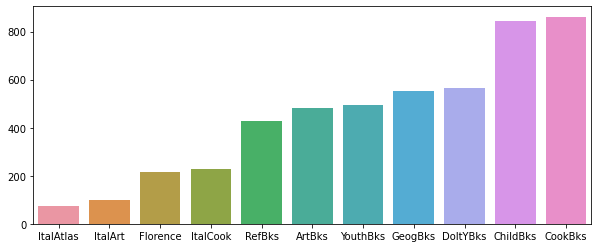

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(count.index,count)

We can see that Cookbks and Childbks are the top selling books

# Association rules

Association rules analysis is a technique to uncover how items are associated to each other

In [7]:
'''
min_support : float (default: 0.5)
              A float between 0 and 1 for minumum support of the itemsets returned.
              The support is computed as the fraction
              `transactions_where_item(s)_occur / total_transactions`.
'''
frequent_itemsets = apriori(books, min_support=0.14, use_colnames=True)
frequent_itemsets#.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
#rules = association_rules(frequent_itemsets, metric="support", min_threshold=0)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


# Support

___This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.___
  
__The Highest Value of Support goes for single book as high upto 0.4230 for Childbks .__  
__The Highest Value of Support goes for pair of books as high upto 0.2560 for (ChildBks, CookBks).__  
__The Highest Value of Support goes for triplet of books as high upto 0.1495 for (GeogBks, ChildBks, CookBks) .__  
 


In [23]:
rules.sort_values('support',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
14,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
15,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347


### For Confidence

This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears  
->  If the value equals to 1 then every time A item was bought the B item was also bought__

One drawback of the confidence measure is that it might misrepresent the importance of an consquent. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure.

__The Highest Value of confidence goes upto 0.793 for if (ChildBks, DoItYBks) then (CookBks) .__  
__The Highest Value of Support goes upto 0.710956 for if (RefBks) then (CookBks) .__  
 This data shows that there is high likliness of selling CookBks.

In [24]:
rules.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
23,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
29,"(CookBks, GeogBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081
30,"(ChildBks, GeogBks)",(CookBks),0.1950,0.4310,0.1495,0.766667,1.778809,0.065455,2.438571
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


__The highest confidence value is  0.793478 of (DoItYBks, ChildBks)and (CookBks) which means that if the 10 sets of (DoItYBks, ChildBks) are bougth then there is the very high chances that 8 of (CookBks) will also be bought .__ 

### For Lift

To account for the base popularity of both constituent items, we use a third measure called lift.This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.  
A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

In [25]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
28,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
22,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
27,(DoItYBks),"(CookBks, ChildBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
24,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
25,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
26,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
23,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
32,(ChildBks),"(CookBks, GeogBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
29,"(CookBks, GeogBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


In [26]:
rules.sort_values('lift',ascending =True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
14,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
15,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


__From the above data we can clearly see that :  
If the person is buying (ChildBks, CookBks) then there is high probability that he is going to buy (GeogBks) which shows that there is strong relation in thier sales even that the sales of cooksbks and childbks are already high.__

In [ ]:
# all the combination where tje value of lift if Greater than 1
rules[rules.lift>1]

__From the above that we can arrange the book seller shelf according the buying pattern by keep the most selling and the combination which are likely to sell with into a very close proximity in way to increase the sale.
We can also keep the less selling books at the adjacten rows in the starting columns so that people can recognize them and they not be left in the dust for to long.__

eg:  
    (GeogBks) 	(CookBks, ChildBks)   
    (CookBks, ChildBks) 	(DoItYBks)  
    etc.